In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df_train = pd.read_csv('D:/kaggle/Titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df_train.shape

(891, 12)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Age', ylabel='Count'>

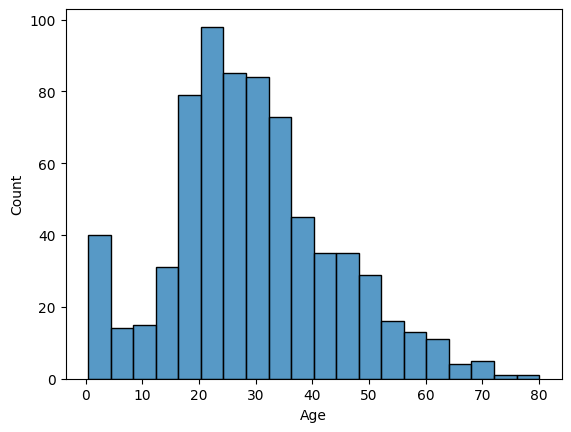

In [47]:
sns.histplot(df_train['Age'])

In [48]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling missing values

In [49]:
df_train.drop('Cabin',inplace=True,axis=1)

In [50]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [52]:
df_train.drop(['PassengerId','Name'],inplace=True,axis=1)

In [53]:
df_train.drop('Ticket',inplace=True,axis=1)

In [54]:
df_train.shape

(891, 8)

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Feature Engineering

In [62]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [57]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [58]:
df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})


In [59]:
df_train=pd.get_dummies(df_train,columns=['Embarked'],drop_first=True,dtype=int)
df_train=pd.get_dummies(df_train,columns=['Pclass'],drop_first=True,dtype=int)

In [60]:
df_train.shape

(891, 10)

In [61]:
df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0
4,0,1,35.0,0,0,8.0500,0,1,0,1


In [63]:
df_train[['Age','SibSp','Parch','Fare']]=scalar.fit_transform(df_train[['Age','SibSp','Parch','Fare']])

In [64]:
df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,0.271174,0.125,0.0,0.014151,0,1,0,1
1,1,0,0.472229,0.125,0.0,0.139136,0,0,0,0
2,1,0,0.321438,0.000,0.0,0.015469,0,1,0,1
3,1,0,0.434531,0.125,0.0,0.103644,0,1,0,0
4,0,1,0.434531,0.000,0.0,0.015713,0,1,0,1


In [65]:
X_train = df_train.drop('Survived',axis=1)
y_train = df_train['Survived']

In [69]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0.271174,0.125,0.0,0.014151,0,1,0,1
1,0,0.472229,0.125,0.0,0.139136,0,0,0,0
2,0,0.321438,0.000,0.0,0.015469,0,1,0,1
3,0,0.434531,0.125,0.0,0.103644,0,1,0,0
4,1,0.434531,0.000,0.0,0.015713,0,1,0,1


In [68]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
df_test = pd.read_csv('D:/kaggle/Titanic/encoded_test.csv')

In [73]:
df_test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0.452723,0.000,0.000000,0.015282,1,0,0,1
1,0,0.617566,0.125,0.000000,0.013663,0,1,0,1
2,1,0.815377,0.000,0.000000,0.018909,1,0,1,0
3,1,0.353818,0.000,0.000000,0.016908,0,1,0,1
4,0,0.287881,0.125,0.111111,0.023984,0,1,0,1


### Training the model

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [75]:
model = Sequential()

In [ ]:
### Input layer
model.add(Dense(units=64,activation='relu',input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))


## First Hidden Layer
model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## Second Hidden Layer
model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## Output Layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

## Early Stopping
early_stopping = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

### Train the model
history = model.fit(X_train,y_train,epochs=1000,batch_size=32,callbacks=[early_stopping], verbose=1,validation_split=0.2)



C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5531 - loss: 0.8333 - val_accuracy: 0.6425 - val_loss: 0.6639
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6785 - loss: 0.6593 - val_accuracy: 0.6425 - val_loss: 0.6429
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7539 - loss: 0.5668 - val_accuracy: 0.6425 - val_loss: 0.6351
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7188 - loss: 0.6004 - val_accuracy: 0.6425 - val_loss: 0.6273
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7954 - loss: 0.4724 - val_accuracy: 0.6425 - val_loss: 0.6196
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7613 - loss: 0.5294 - val_accuracy: 0.6425 - val_loss: 0.6127
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7670 - loss: 0.5731 - val_accuracy: 0.6425 - val_loss: 0.6188
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8010 - loss: 0.4841 - val_accu

In [87]:
### Predict on the test dataset 
y_pred = model.predict(df_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
y_pred_binary

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [85]:
### Create Sample submission file
pred = pd.DataFrame(y_pred_binary)
gen_submission = pd.read_csv('D:/kaggle/Titanic/gender_submission.csv')
dataset = pd.concat([gen_submission['PassengerId'],pred],axis=1)
dataset.to_csv('final_submission.csv',index=False)